In [52]:
#options(scipen = 2)

In [1]:
library(stringr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.0     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ forcats 1.0.0
✔ readr   2.1.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
library(scales)
library(vroom)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘vroom’


The following object is masked from ‘package:scales’:

    col_factor


The following objects are masked from ‘package:readr’:

    as.col_spec, col_character, col_date, col_datetime, col_double,
    col_factor, col_guess, col_integer, col_logical, col_number,
    col_skip, col_time, cols, cols_condense, cols_only, date_names,
    date_names_lang, date_names_langs, default_locale, fwf_cols,
    fwf_empty, fwf_positions, fwf_widths, locale, output_column,
    problems, spec




In [3]:
setwd("/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/compare")

# Compare to published bulk

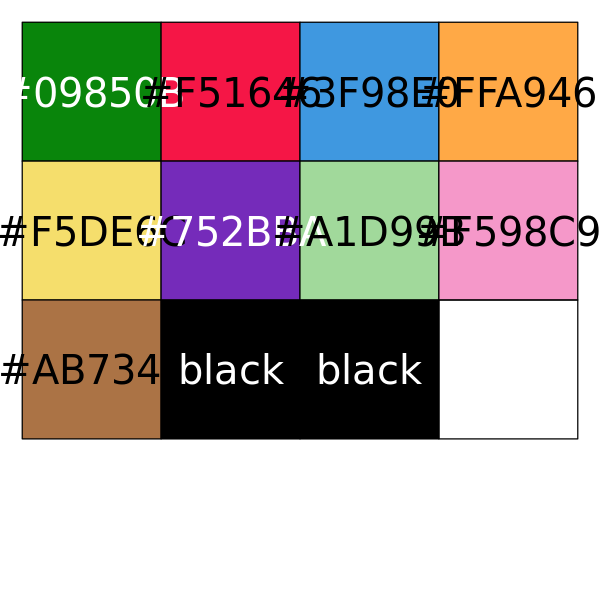

In [4]:
cells =  c('acinar','alpha','beta','delta','ductal',#'endothelial','gamma',
                'gamma','bulk')#,'immune','stellate')
conc_colors = c('acinar'='#09850B', 'alpha'='#F51646', 'beta'='#3F98E0',
                 'delta'='#FFA946', 'ductal'='#F5DE6C', 'endothelial'='#752BBA', 
                 'gamma'='#A1D99B', 'immune'='#F598C9', 'stellate'='#AB7345', 
                'bulk'='black', 'any'='black')
options(repr.plot.width=5, repr.plot.height=5)
scales::show_col(conc_colors, cex_label=2)

In [16]:
# Read in bulk effects
bulk_res <- vroom('../caQTLs_rasqual/bulk/run1/Results_run1_all.tsv')
bulk_res$Feature_SNP <- paste0(bulk_res$Feature, "::", bulk_res$rsID)

bulk_res_sub <- select(bulk_res, Feature_SNP,
       bulk.Effect_size = Effect_size, bulk.Log10_qval=Log10_qval, bulk.P_VAl=P_VAl, 
       bulk.flag_fdr10=flag_fdr10, bulk.flag_fdr05=flag_fdr05, bulk.flag_fdr01=flag_fdr01)

dim(bulk_res)
head(bulk_res)

[1] 11650033       31

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,Log_likelihood_H0,Convergence_status,r2_fSNPs,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,Feature_SNP
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32622251:G:A,chr6,32622251,G,A,0.333333,0,0.999943,-104.9973,⋯,239.3217,0,0.992051,0.946658,3.022743e-107,-657,TRUE,TRUE,TRUE,chr6:32622377-32623439::chr6:32622251:G:A
chr6:32622377-32623439,chr6:32621274:C:A,chr6,32621274,C,A,0.333333,0,0.999943,-104.9973,⋯,239.3217,0,0.992051,0.946658,3.022743e-107,-1634,TRUE,TRUE,TRUE,chr6:32622377-32623439::chr6:32621274:C:A
chr6:32622377-32623439,chr6:32624933:T:C,chr6,32624933,T,C,0.333333,0,0.999943,-104.9973,⋯,239.3217,0,0.992051,0.946658,3.022743e-107,2025,TRUE,TRUE,TRUE,chr6:32622377-32623439::chr6:32624933:T:C
chr6:32622377-32623439,chr6:32622090:C:T,chr6,32622090,C,T,0.333333,0,0.998061,-104.9973,⋯,239.3022,0,0.992051,0.945143,3.082264e-107,-818,TRUE,TRUE,TRUE,chr6:32622377-32623439::chr6:32622090:C:T
chr6:32622377-32623439,chr6:32622014:T:C,chr6,32622014,T,C,0.333333,0,0.998144,-104.9973,⋯,239.3022,0,0.992051,0.945143,3.082264e-107,-894,TRUE,TRUE,TRUE,chr6:32622377-32623439::chr6:32622014:T:C
chr6:32622377-32623439,chr6:32623975:G:A,chr6,32623975,G,A,0.333333,0,0.998061,-104.9973,⋯,239.3022,0,0.992051,0.945143,3.082264e-107,1067,TRUE,TRUE,TRUE,chr6:32622377-32623439::chr6:32623975:G:A


Rows: 96373 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature_SNP)`
Rows: 107935 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quie

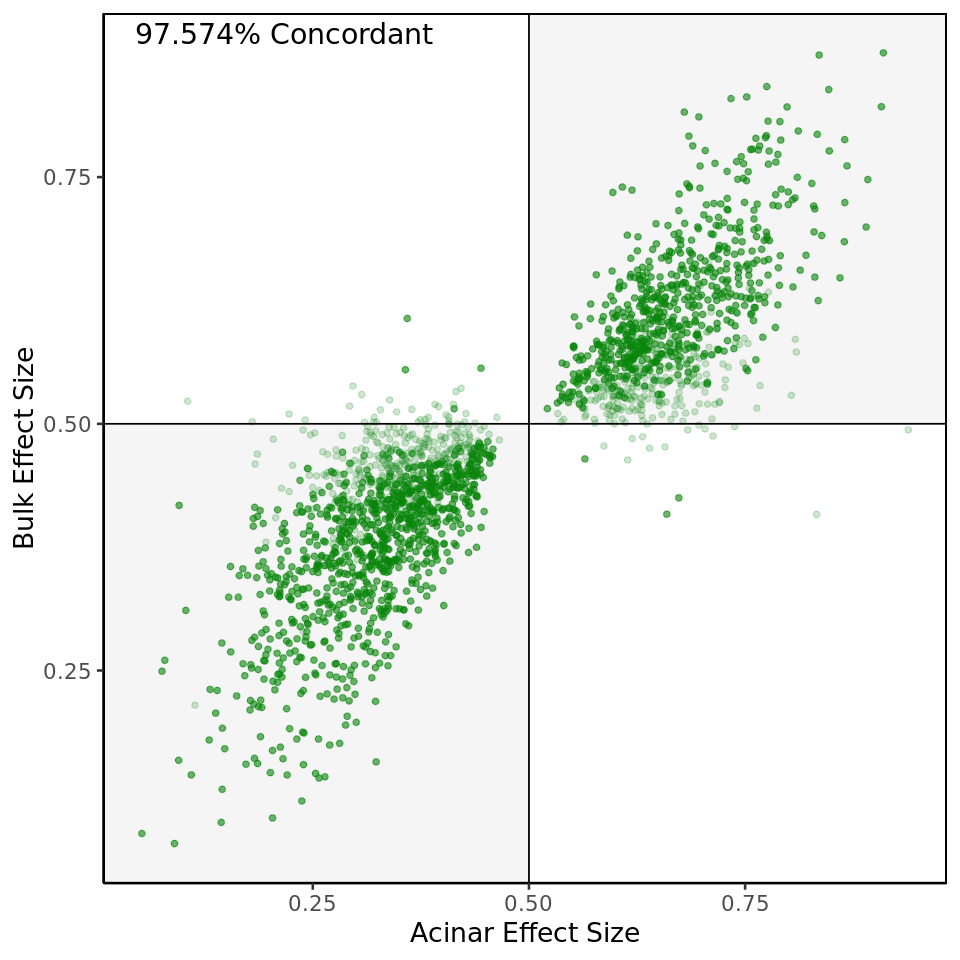

Rows: 79636 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature_SNP)`


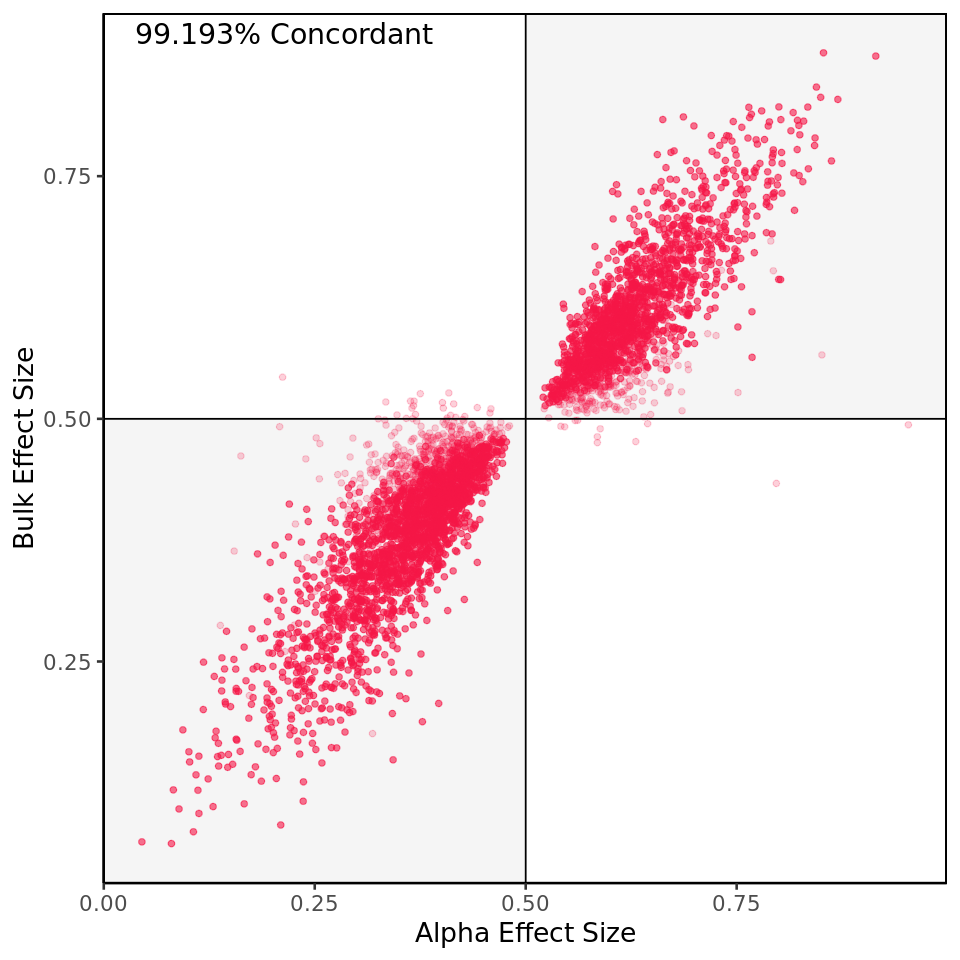

Rows: 49135 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature_SNP)`


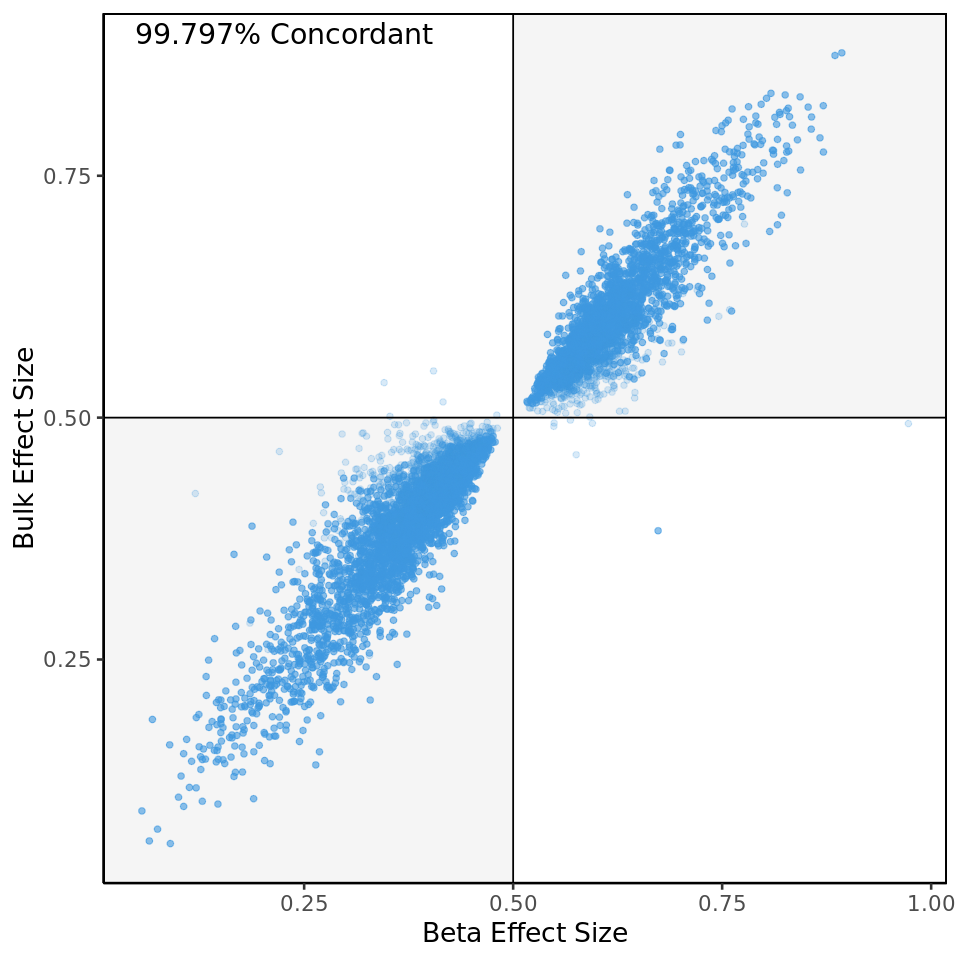

Rows: 60138 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature_SNP)`


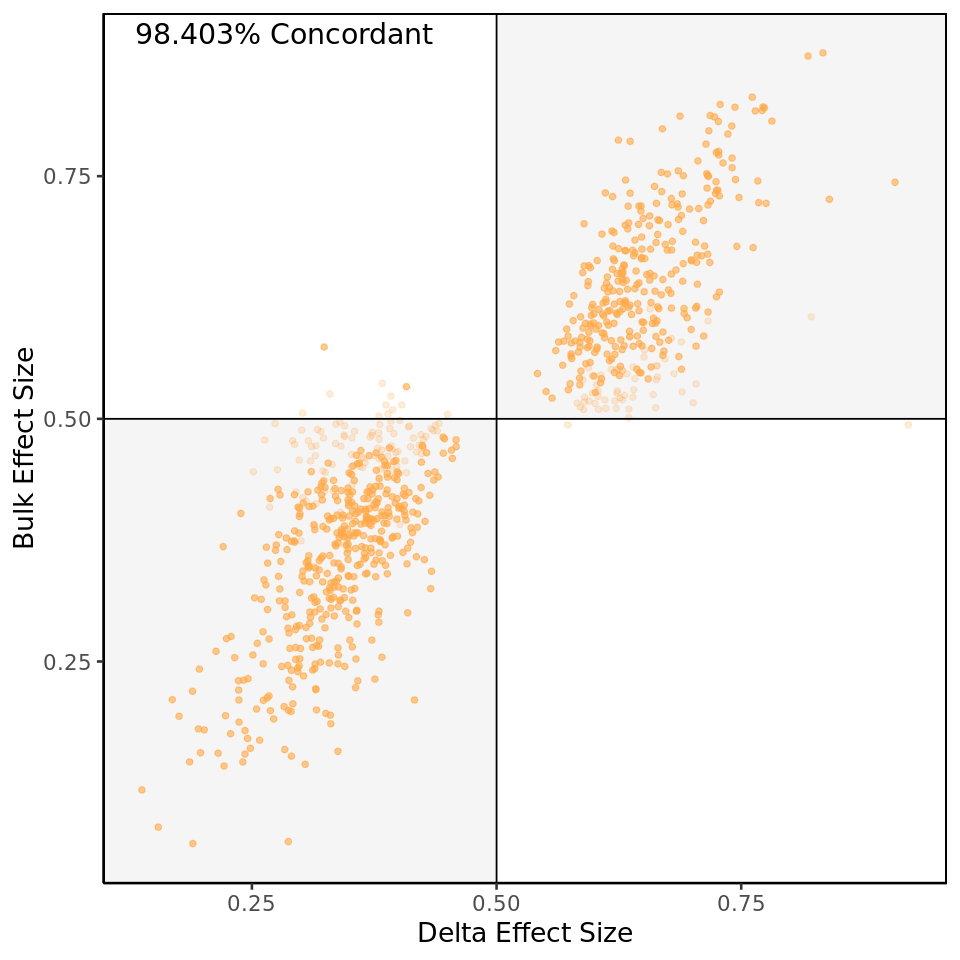

Rows: 252057 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature_SNP)`


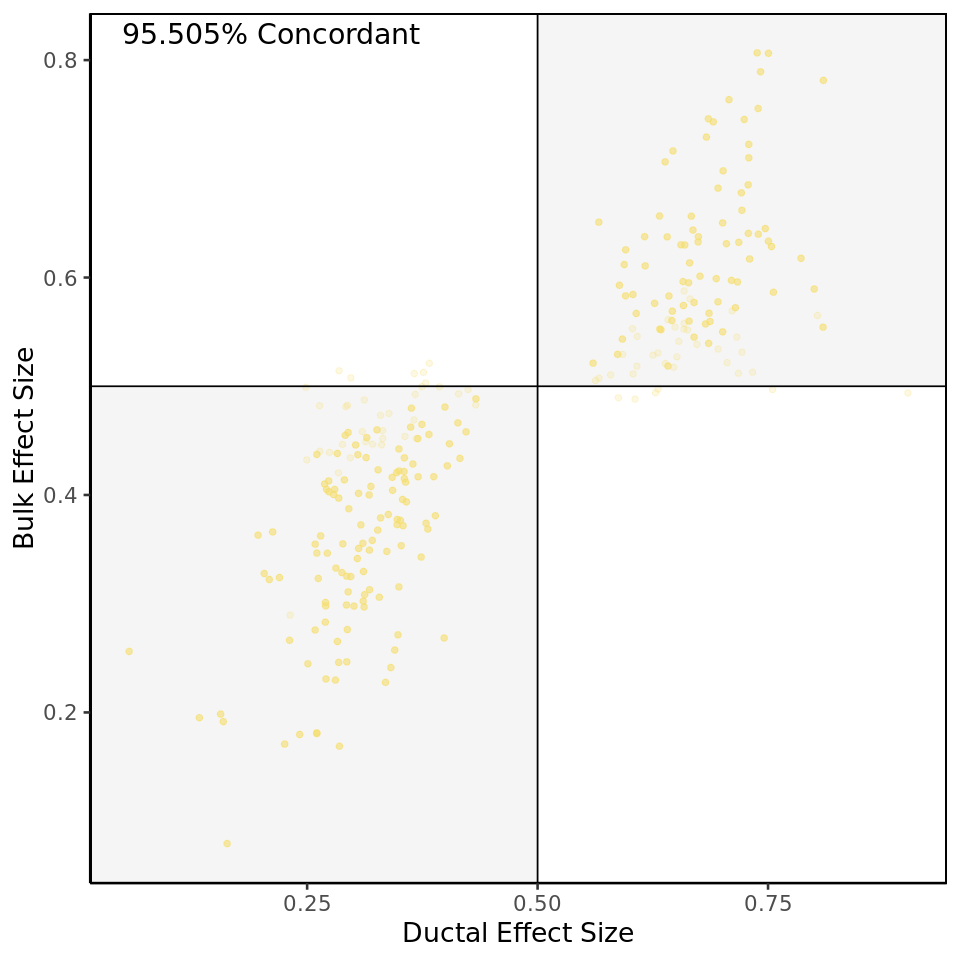

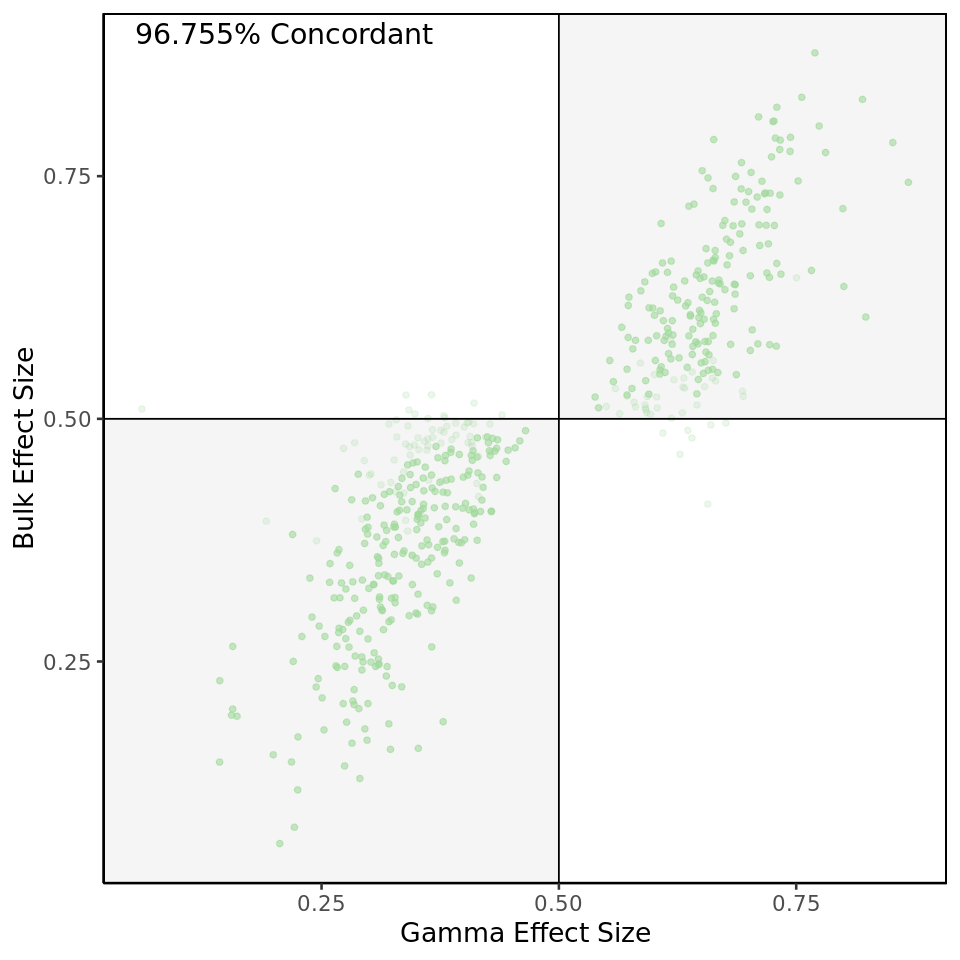

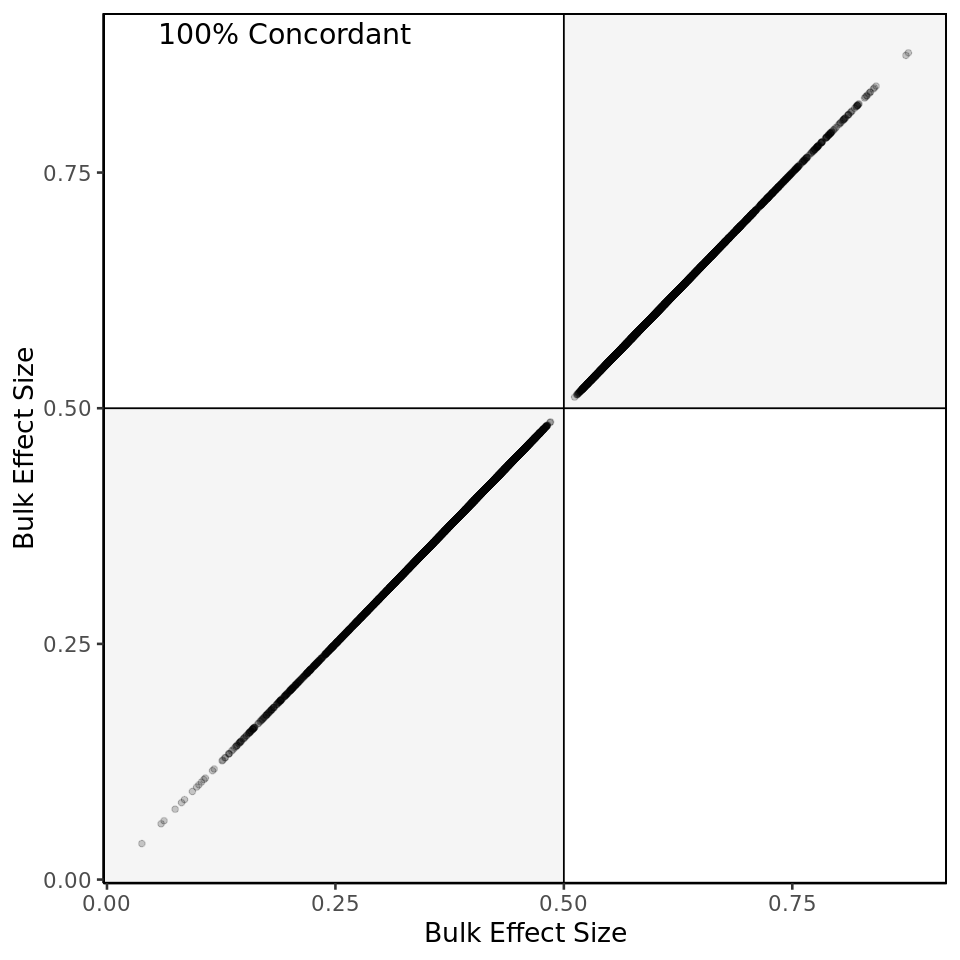

In [63]:
options(repr.plot.width=8, repr.plot.height=8)
for (c in cells) {
    ct_res_lead = vroom(paste0("../caQTLs_rasqual/", c ,"/run1/Results_run1F_lead.tsv"))
    ct_res_lead$Feature_SNP <- paste0(ct_res_lead$Feature, "::", ct_res_lead$rsID)
    ct_res_lead_sig <- filter(ct_res_lead, flag_fdr05)
    ct_lead_bulk <- left_join(ct_res_lead_sig, bulk_res_sub)
    
    write.table(ct_lead_bulk, paste0('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/figures/Supp_concordance_ownbulk_',
                      c,"_data.tsv"), sep='\t', quote=F, row.names=T, col.names=T)
    
    concordance <- sum((ct_lead_bulk$Effect_size > 0.5 & ct_lead_bulk$bulk.Effect_size > 0.5) | 
                   (ct_lead_bulk$Effect_size < 0.5 & ct_lead_bulk$bulk.Effect_size < 0.5)) * 100 / nrow(ct_lead_bulk)

    p1 <- ggplot(ct_lead_bulk, aes(x=Effect_size, y=bulk.Effect_size, alpha=bulk.flag_fdr05, color=flag_fdr05)) +
        geom_rect(xmin=-Inf, xmax=0.5, ymin=-Inf, ymax=0.5, fill='gray93', color=NA, alpha=0.05) + 
        geom_rect(xmin=0.5, xmax=Inf, ymin=0.5, ymax=Inf, fill='gray93', color=NA, alpha=0.05) + 
        geom_rect(xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf, color='black', fill=NA) + 
        geom_point() + theme_classic(base_size=16) + geom_vline(xintercept=.5) + geom_hline(yintercept=.5) +
        annotate(geom="text", x=-Inf, y=Inf, size=6,
                 label=paste0("\n\t\t\t\t\t", substring(concordance, 0,6), "% Concordant")) +
        theme(legend.position='none') + ylab("Bulk Effect Size") + xlab(paste0(str_to_title(c), " Effect Size")) +
        scale_color_manual(values=unname(conc_colors[names(conc_colors)==c])) +
        scale_alpha_manual(values=c(0.2,0.6))
    p1
    
    print(p1)
}

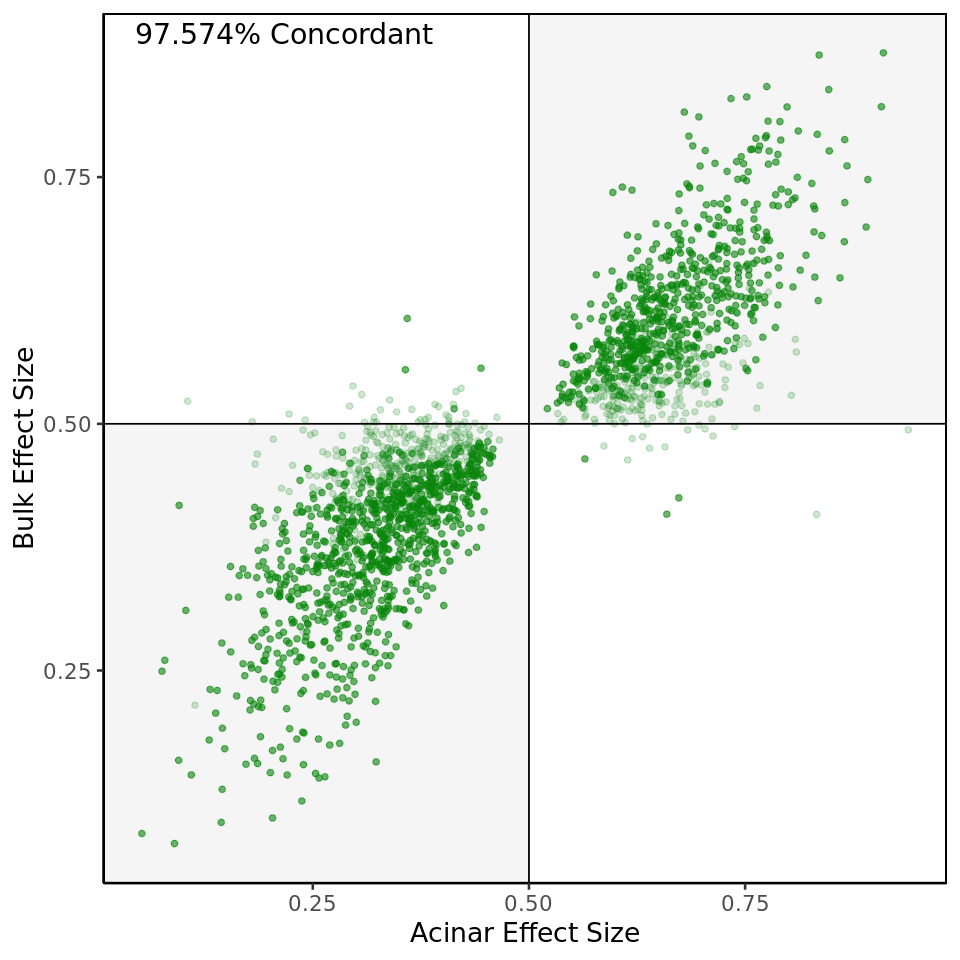

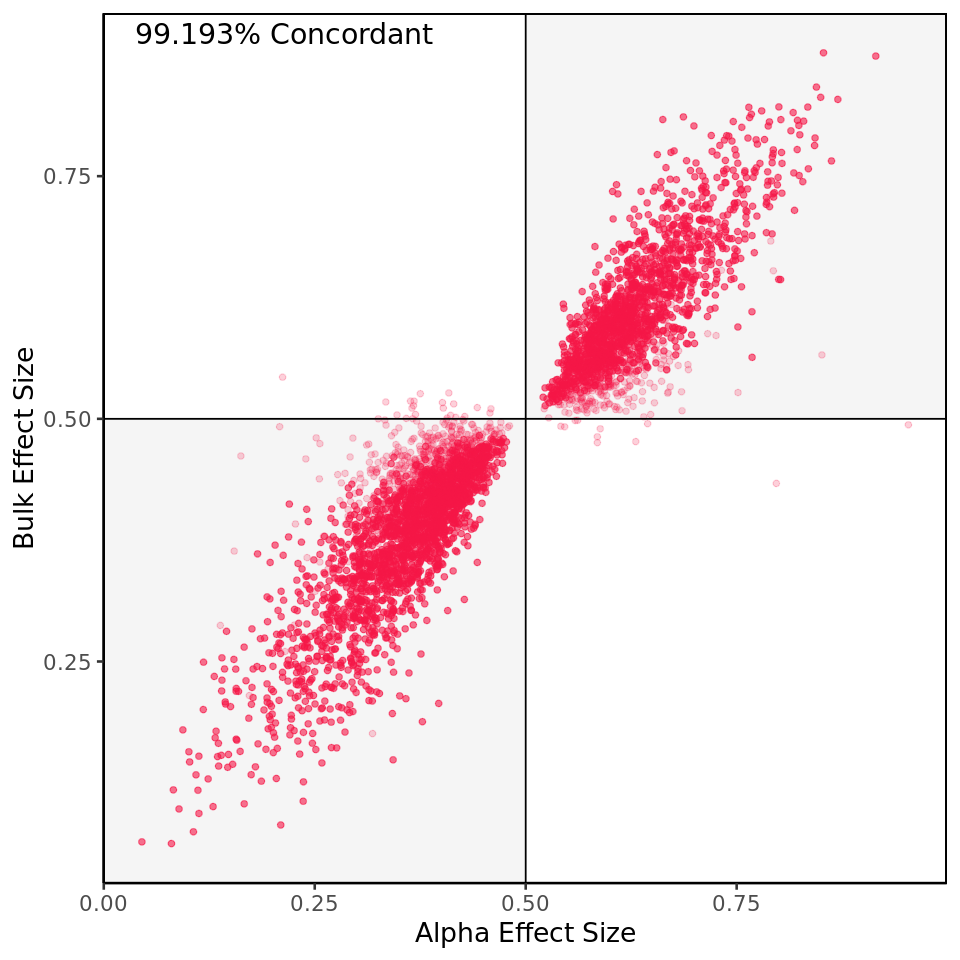

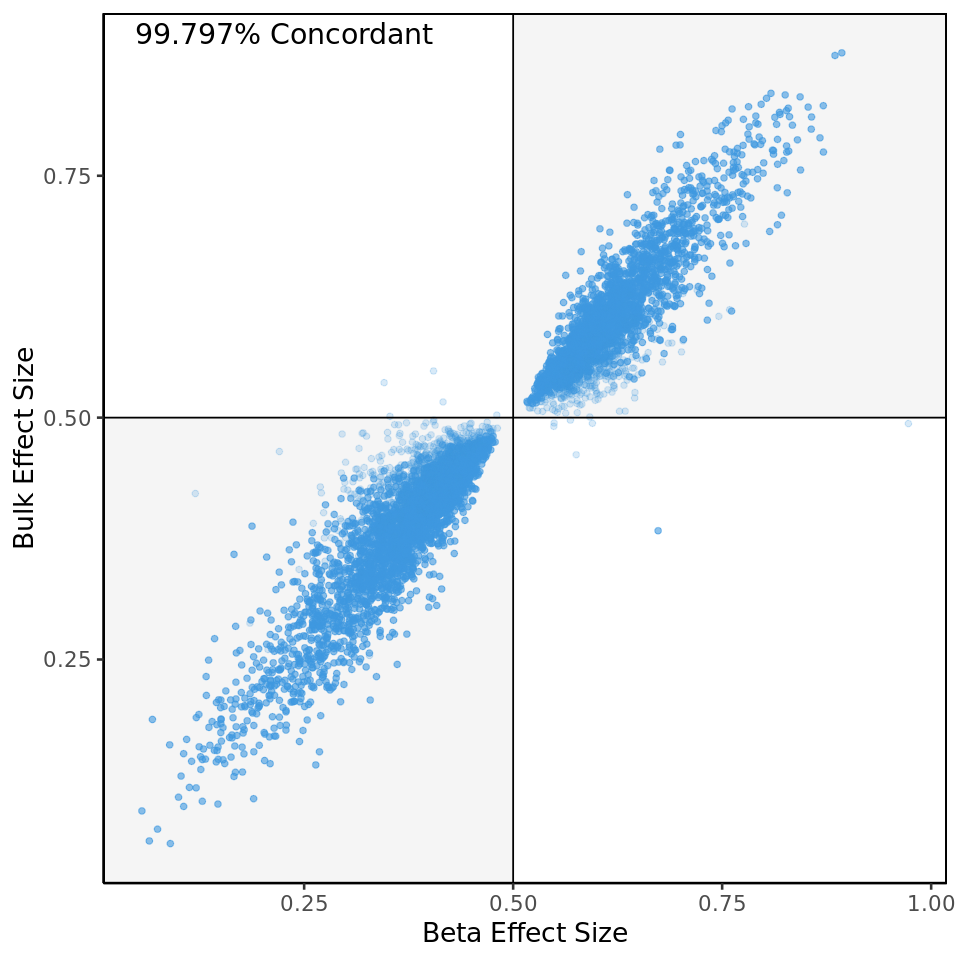

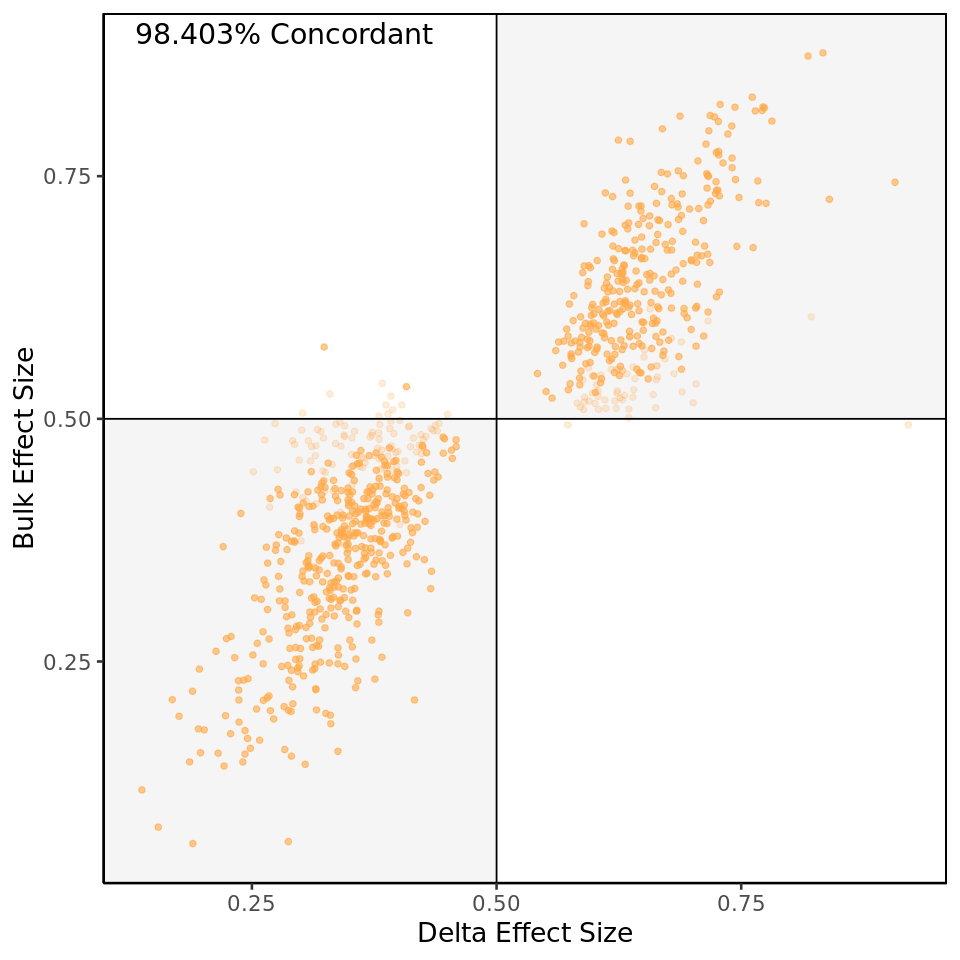

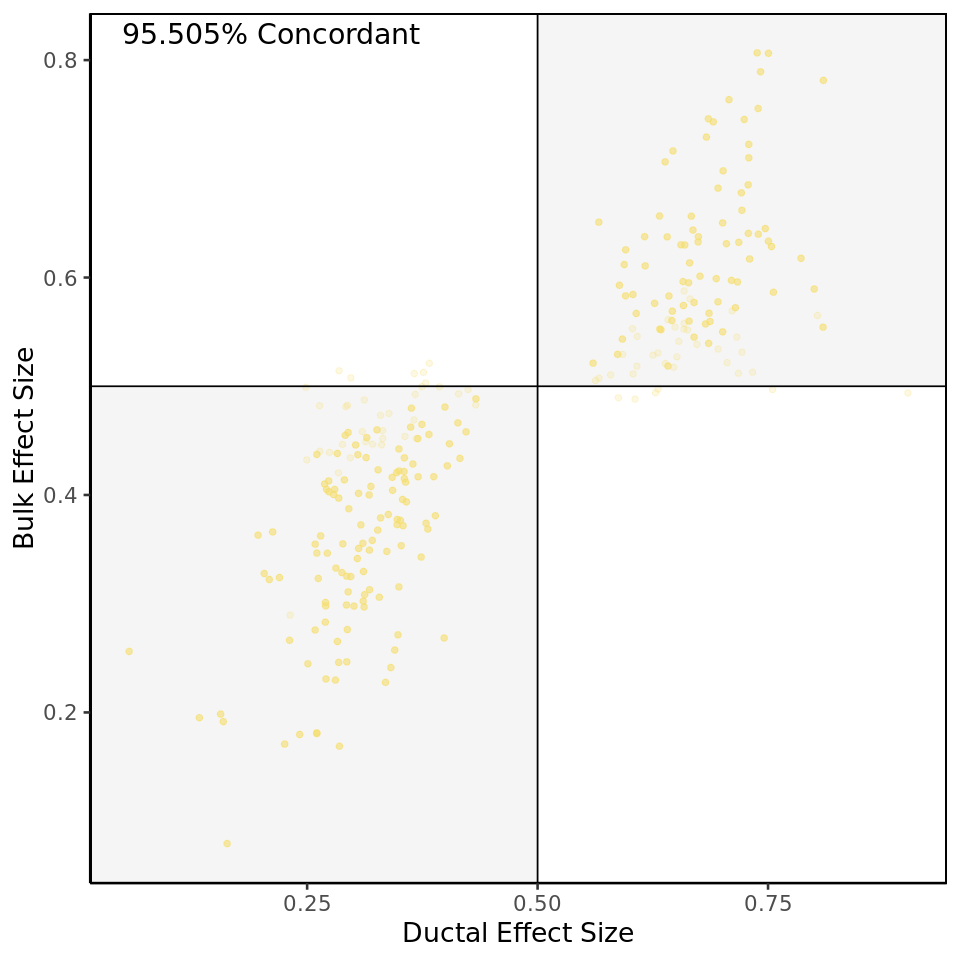

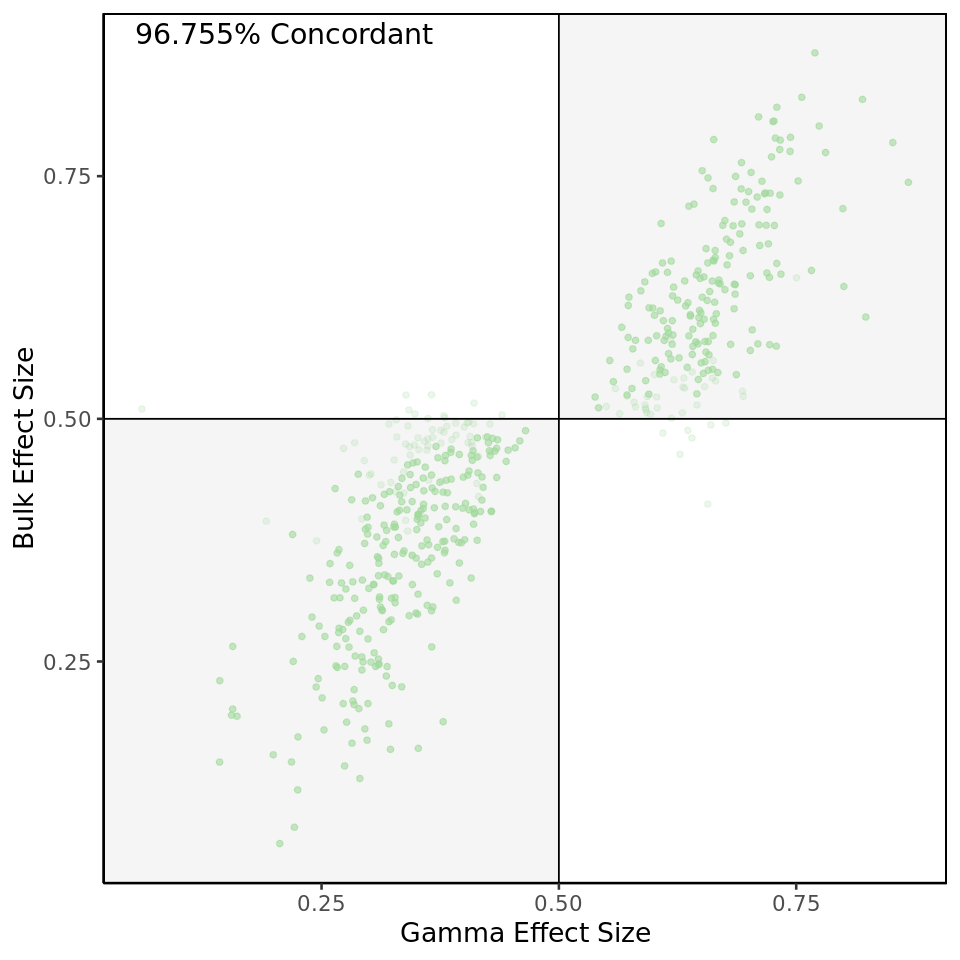

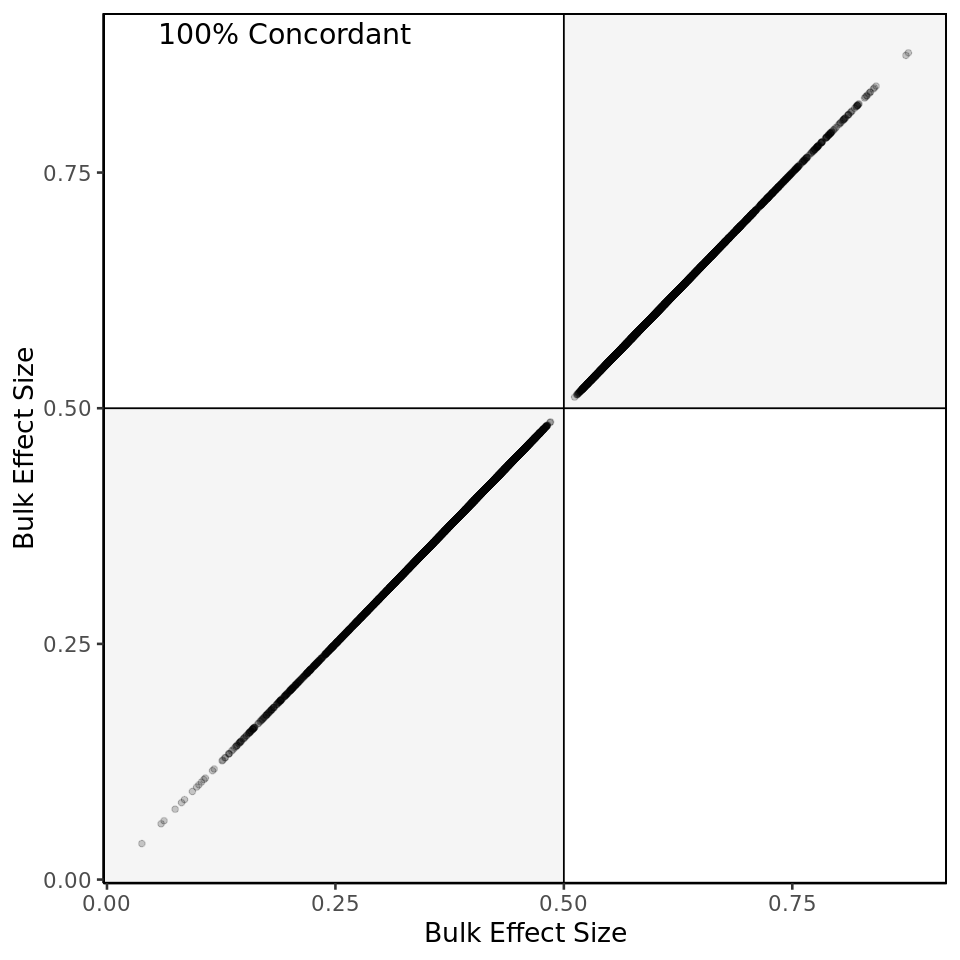

In [67]:
cells =  c('acinar','alpha','beta','delta','ductal',#'endothelial','gamma',
                'gamma','bulk')#,'immune','stellate')
conc_colors = c('acinar'='#09850B', 'alpha'='#F51646', 'beta'='#3F98E0',
                 'delta'='#FFA946', 'ductal'='#F5DE6C', 'endothelial'='#752BBA', 
                 'gamma'='#A1D99B', 'immune'='#F598C9', 'stellate'='#AB7345', 
                'bulk'='black', 'any'='black')

options(repr.plot.width=8, repr.plot.height=8)
for (c in cells) {
    ct_lead_bulk <- read.table(paste0('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/figures/Supp_concordance_ownbulk_',
                      c,"_data.tsv"), sep='\t', header=T)
    
    concordance <- sum((ct_lead_bulk$Effect_size > 0.5 & ct_lead_bulk$bulk.Effect_size > 0.5) | 
                   (ct_lead_bulk$Effect_size < 0.5 & ct_lead_bulk$bulk.Effect_size < 0.5)) * 100 / nrow(ct_lead_bulk)

    p1 <- ggplot(ct_lead_bulk, aes(x=Effect_size, y=bulk.Effect_size, alpha=bulk.flag_fdr05, color=flag_fdr05)) +
        geom_rect(xmin=-Inf, xmax=0.5, ymin=-Inf, ymax=0.5, fill='gray93', color=NA, alpha=0.05) + 
        geom_rect(xmin=0.5, xmax=Inf, ymin=0.5, ymax=Inf, fill='gray93', color=NA, alpha=0.05) + 
        geom_rect(xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf, color='black', fill=NA) + 
        geom_point() + theme_classic(base_size=16) + geom_vline(xintercept=.5) + geom_hline(yintercept=.5) +
        annotate(geom="text", x=-Inf, y=Inf, size=6,
                 label=paste0("\n\t\t\t\t\t", substring(concordance, 0,6), "% Concordant")) +
        theme(legend.position='none') + ylab("Bulk Effect Size") + xlab(paste0(str_to_title(c), " Effect Size")) +
        scale_color_manual(values=unname(conc_colors[names(conc_colors)==c])) +
        scale_alpha_manual(values=c(0.2,0.6))
    p1
    
    print(p1)
}